In [14]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import GetOldTweets3 as got
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [15]:
def get_tweets():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('corona virus')\
                                           .setSince("2019-09-01")\
                                           .setUntil("2020-05-30")\
                                           .setMaxTweets(200)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets=[[tweet.text] for tweet in tweets]
    return text_tweets

text=""
text_tweets=get_tweets()
length=len(text_tweets)

for i in range(0, length):
    text=text_tweets[i][0] + "  " + text
    

In [16]:
# text=open('input.txt', encoding='utf8').read()
lower_case=text.lower()
#print(lower_case)
cleaned_data=lower_case.translate(str.maketrans('','', string.punctuation))
#print(cleaned_data)

In [17]:
tokens=word_tokenize(cleaned_data, "english")
tagged = nltk.pos_tag(tokens)
#print(toknization_words)

In [20]:
final_words=[]
for word in tokens:
    if word not in stopwords.words('english'):
        final_words.append(word)

#print(final_words)

In [21]:
emotion_list=[]
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line=line.replace('\n','').replace(',','').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        #print("Word :" + word + "  Emotion :" + emotion)
        if word in final_words:
            emotion_list.append(emotion)
            
print(emotion_list)
Count=Counter(emotion_list)
print(Count)

[' bored', ' free', ' attached', ' angry', ' safe', ' sad', ' independent', ' powerless', ' fearful', ' happy', ' loved', ' happy']
Counter({' happy': 2, ' bored': 1, ' free': 1, ' attached': 1, ' angry': 1, ' safe': 1, ' sad': 1, ' independent': 1, ' powerless': 1, ' fearful': 1, ' loved': 1})


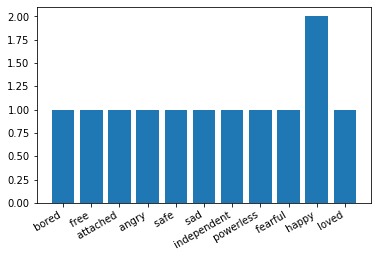

In [22]:
fig, ax1=plt.subplots()
ax1.bar(Count.keys(), Count.values())
fig.autofmt_xdate()
plt.savefig('senti_fig.png')
plt.show()